<a href="https://github.com/Ncxs99">@Ncxs99</a> --> My Github Portfolio

<a href="https://www.linkedin.com/in/nacer-séré-a306681b6/">@Nacer Séré</a> --> My Linkedin Profile

<a href="https://workspace.google.com/intl/fr/gmail/">modousere196@gmail.com</a> --> My Email address for any message ! You're welcome 


### Estimation Of Ornstein-Uhlenbeck Process Parameters. 


The <a href="https://planetmath.org/ornsteinuhlenbeckprocess">Ornstein-Uhlenbeck</a> process is a fundamental stochastic model extensively used to describe mean-reverting behaviors in various fields, including finance, physics, and biology. Accurate calibration and parameter estimation of the OU model are crucial for effectively capturing the dynamics of such processes.

This project focuses on developing robust methodologies for calibrating and estimating the parameters of the Ornstein–Uhlenbeck model. The primary parameters of interest are:

$\kappa$: The rate of mean reversion, indicating how quickly the process reverts to its long-term mean.

$\theta$: The long-term mean level around which the process oscillates.

$\sigma$: The volatility parameter, representing the degree of randomness or noise in the process.


### Problem Definition

Let $S_t, S_{t+\Delta t}, S_{t+2 \Delta t}, \ldots, S_{t+N \Delta t}$ with $\Delta t=(T-t) / N$ be a sequence of discrete values observed at regular time intervals $\Delta t>0$ which are assumed to follow an Ornstein-Uhlenbeck process
$$
d S_t=\kappa\left(\theta-S_t\right) d t+\sigma d W_t
$$
where the mean-reversion rate $\kappa$, long-term mean $\theta$ and volatility $\sigma$ are constant parameters and $W_t$ is a standard Wiener process on the probability space $(\Omega, \mathscr{F}, \mathbb{P})$.

Using maximum-likelihood estimation or otherwise, let's calculate the historical estimates of $\kappa, \theta$ and $\sigma$.

In this project, we will use three main methods :

- <a href="https://machinelearningmastery.com/stochastic-optimization-for-machine-learning/">Stochastic Algorithms</a> where we will review some very famous and common methods such as <a href="https://machinelearningmastery.com/gradient-descent-optimization-from-scratch/">Gradient Descent<a>, <a href="https://machinelearningmastery.com/adam-optimization-from-scratch/">ADAM</a> . In fact, stochastic algorithms are just a more general and theoretical framework where ADAM and Gradient Descent are just particular cases.
    
    
- <a href="https://medium.com/@dahami/understanding-ordinary-least-squares-ols-and-its-applications-in-statistics-machine-learning-ad2c13681501">OLS</a> technics which give us exact solutions to compare its results to stochastic algorithms ones . 
    
    
- <a href="https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1">Maximum Likelihood Estimation</a> which gives us also exact solutions and we will compare its results to the two previous methods.

### Problem Solution

#### A. Stochastic Algorithms Method

Ressources : <a href="https://link.springer.com/book/10.1007/978-3-319-90276-0">Numerical Probability</a>, course from <a href="https://www.lpsm.paris/users/pages/index">Gilles Pagès</a>, professor and co-responsible of the <a href="https://finance.math.upmc.fr">M2 probabilités et Finance</a>.

In Finance, one often faces some optimization problems or zero search problems. The former often reduce to the latter since, at least in a convex framework, minimizing a function amounts to finding a zero of its gradient. The most commonly encountered examples are the extraction of implicit parameters (implicit volatility of an option, implicit correlations for a single best-of-option or in the credit markets), the calibration, the optimization of an exogenous parameters for variance reduction (regression, importance sampling, etc). All these situations share a common feature: the involved functions all have a representation as an expectation, namely they read $h(y)=\mathbb{E} H(y, Z)$ where $Z$ is a $q$-dimensional random vector. 

Stochastic approximation can also be presented as a probabilistic extension of Newton-Raphson like zero search recursive procedures of the form
$$
\forall n \geq 0, \quad y_{n+1}=y_n-\gamma_{n+1} h\left(y_n\right) \quad\left(0<\gamma_n \leq \gamma_0\right),
$$
where $h: \mathbb{R}^d \rightarrow \mathbb{R}^d$ is a continuous vector field satisfying a sub-linear growth assumption at infinity. Under some appropriate mean-reverting assumptions, one shows that such a procedure is bounded and eventually converges to a zero $y_*$ of $h$. As an example, if one sets $\gamma_n=\left(J_h\left(y_{n-1}\right)\right)^{-1}$ - where $J_h(y)$ denotes the Jacobian of $h$ at $y$ - the above recursion is just the regular Newton-Raphson procedure for zero search of the function $h$ (one can also set $\gamma_n=\gamma\left(J_h\left(y_{n-1}\right)\right)^{-1}, \gamma>0$ ).

In one dimension, mean-reversion may be obtained by an increasing assumption made on the function $h$ or, more simply, by assuming that $h(y)\left(y-y_*\right)>0$ for every $y \neq y_*$ : if this is the case, $y_n$ is decreasing as long as $y_n>y_*$ and increasing whenever $y_n<y_*$. In higher dimensions, this assumption becomes $\left(h(y) \mid y-y_*\right)>0, y \neq y_*$, and will be extensively called upon later.

Our main goal is to find the optimal historical OU parameters with empirical data . In other words : If we have an OU process, how can we estimate its parameters, at least **historically** ? Since our first method uses stochastic algorithms, then, we must have some parameters to learn, that is, we have to find some parameters, which are different from the OU ones and that have to be **optimized** through stochastic methods. To do so, let's define properly our problem to see what we are meaning .


#### Problem (re)-definition

We let the relationship between consecutive $S_t, S_{t+\Delta t}, \ldots, S_{t+N \Delta t}$ be
$$
S_{t+\Delta t}=m S_t+c+\epsilon_t, \epsilon_t \sim \mathcal{N}\left(0, \sigma_\epsilon^2\right)
$$
where $m$ and $c$ are **the regression parameters**, $\epsilon_t$ is normally distributed and is independent and identically distributed.

By comparing the relationship between the linear fit and the solution of the OrnsteinUhlenbeck process model
$$
S_{t+\Delta t}=S_t e^{-\kappa \Delta t}+\theta\left(1-e^{-\kappa \Delta t}\right)+\int_t^{t+\Delta t} \sigma e^{-\kappa(t+\Delta t-u)} d W_u
$$
where $\int_t^{t+\Delta t} \sigma e^{-\kappa(t+\Delta t-u)} d W_u \sim \mathcal{N}\left(0, \frac{\sigma^2}{2 \kappa}\left(1-e^{-2 \kappa \Delta t}\right)\right)$, the Ornstein-Uhlenbeck parameters can be equated as
$$
\kappa=-\frac{\log m}{\Delta t}, \quad \theta=\frac{c}{1-m} \quad \text { and } \quad \sigma=\sigma_\epsilon \sqrt{\frac{2 \kappa}{1-e^{-2 \kappa \Delta t}}} .
$$

In this crucial problem definition, we see that indeed, one way to derive OU parameters is to assume that we have a linear relationship between the next historically observed data price and the previous observed data price . Hence, if we find the value of the **regression model parameters**, namely, $m$ and $c$, then, we can directly infer the value of the historical parameters of the OU process. 

One question remains : How can we compute the parameters $m$ and $c$ if we assume that there is a linear relationship between the next price and the previous one ? 

For estimating the pair $(m, c)$, we can compute it by solving the following ordinary least-squares problem
$$
O L S\left\{\underset{m, c \in \mathbb{R}}{\operatorname{minimise}} \sum_{i=1}^N\left(S_{t+i \Delta t}-m S_{t+(i-1) \Delta t}-c\right)^2 \right\}
$$

At this stage, instead of using OLS method to derive the optimal parameters $m$ and $c$, we will use stochastic algorithms methods . We will see in a second method later, how we can derive OU parameters analytically by using OLS method and then compare their results with the previous ones.

So, why can we apply stochastic algorithms ? In fact, the OLS optimization problem we've just written is an empirical estimation of a more formal theoretical formula : 

<img src="SL.png" alt="Transposition of a vector" title="Vector transposition" width="700"> .

This image is derived from the beautiful book of <a href="https://scholar.google.com/citations?user=vDw80QEAAAAJ&hl=en">Warren B Powell</a>, on <a href="https://onlinelibrary.wiley.com/doi/book/10.1002/9781119815068">Reinforcement Learning and Stochastic Optimization: A Unified Framework for Sequential Decisions</a> where the author compares a pure statistical learning problem and a stochastic optimization one . It is a very general and theoretical framework and it emphasizes the difference between statiscal learning, pure learning and stochastic optimization . 

If we adapt our OLS minimisation problem, then we can write our problem in this form : $$\min _\theta \mathbb{E} F(\theta, W)$$ and the loss is defined by : $$L(\theta) = \mathbb{E} F(\theta, W)$$
where :

- $\sum_{i=1}$ corresponds to $\mathbb{E}$

- $\theta$ corresponds to the couple $(m, c)$

- $W$ corresponds to $\epsilon_i = S_{t+i \Delta t}-m S_{t+(i-1) \Delta t}-c$. So, $W$ is a random vector which follows $\sim \mathcal{N}\left(0, \sigma_\epsilon^2\right)$

- $F$ corresponds to the square function : $F(x) = x^2$ . The first parameter $\theta$ of the function $F$ in our notation is just a way to emphasize that our loss function depends on it.

If we use <a href="https://www.lpsm.paris/users/pages/index">Gilles Pagès</a> numerical probability course and its stochastic algorithms framework, $$h(y)=\mathbb{E} H(y, Z)$$ then : 

- $h$ corresponds to $L$

- $y$ corresponds to $\theta$

- $H$ corresponds to $F$

- $Z$  corresponds to $W$


In our framework hence, the pair $(m, c)$, can be computed by solving the following stochastic optimization problem
$$
\underset{\theta = (m, c) \in \mathbb{R}^2}{\text{minimize}} \,L(\theta) = \mathbb{E} F(\theta, W) = \mathbb{E} F(\theta, \epsilon_i)
$$

where $\epsilon_i$ $\sim \mathcal{N}\left(0, \sigma_\epsilon^2\right)$

#### Data Generation Or Simulation

Now it is time to generate the data in order to estimate the values of the parameters $(m,c)$ of our optimization problem . One question remains : How do we generate the data in finance ? In fact, there are lot of ways to generate data in finance . The most common and encountered methods are the following : 

- Use <a href="https://www.ibm.com/think/topics/monte-carlo-simulation">Monte Carlo Simulations</a> to generate various scenarios of the underlying asset . 

- Use some advanced methods such as :
  - <a href="https://medium.com/the-research-nest/exploring-gans-to-generate-synthetic-data-ca48f8a4b518">Generative Adversarial Networks or GANs</a> for synthetic data generation and more specifically, <a href="https://towardsdatascience.com/synthetic-time-series-data-a-gan-approach-869a984f2239">TimeGANs</a> for synthetic time series data generation
  
  - <a href="https://www.forbes.com/sites/bernardmarr/2024/08/29/20-generative-ai-tools-for-creating-synthetic-data/">Generative AI</a> methods . These methods are recent and not well understood . They are currently subjects of PhD thesis
  
  - <a href="https://syncedreview.com/2024/07/01/achieving-8x-performance-gains-with-reinforcement-learning-on-synthetic-data-in-large-language-models/">Reinforcement Learning</a> for synthetic data generation where we build an agent that will try to mimic real observed datas 
  
  
In our case, we decided to use Monte Carlo Simulations . In fact, we are dealing with underlying asset scenarios and we have to discretize our time interval. So, MC simulations are very suitable in our case. To generate our data, we will use our own `ncxs99_module` which is our own high level <a href="https://www.geeksforgeeks.org/abstract-classes-in-python/">Abstract Python Class</a> for simulate and plot financial models. We use the same philosophy like <a href="https://www.nvidia.com/en-us/glossary/pytorch/">PyTorch</a> . Indeed, for any financial model simulation, we will inherit from an abstract high level library and then define and customize our own model simulation according to how we understand the problem . 

In [1]:
from ncxs99_module import Ncxs99SimModule

We then import the necessary Python libraries to simulate an Ornstein-Uhlenbeck process . 

In [2]:
import numpy as np
import pandas as pd
from numpy.random import default_rng, SeedSequence
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()
sq = SeedSequence()
rng = default_rng(sq)

We then write our code to simulate an Ornstein-Uhlenbeck process with its different parameters .

In [3]:
class OrnsteinUhlenbeck(Ncxs99SimModule):
    
    def __init__(self, kappa, theta, sigma):
        self.kappa = kappa  # mean reverting rate 
        self.theta = theta  # long term mean 
        self.sigma = sigma  # volatility 
        
    def _stochastic_integral(self, n_times: int, n_paths: int,
                            final_time: float = 1.0,
                            random_state: np.random.Generator = rng,
                            increments: bool = False) :
        dB = np.sqrt(final_time / n_times) * random_state.standard_normal((n_times, n_paths))
        if increments:
            return dB
        else:
            brownian = np.zeros((n_times+1, n_paths))
            brownian[1:] = np.cumsum(dB, axis=0)
            return brownian
        
    def stochastic_process_sim(self,init_value: float,
                               n_times: int, n_paths: int,
                               final_time: float = 1.0,
                               random_state: np.random.Generator = rng,
                               increments: bool = False):
        dt = final_time / n_times
        Bt_increments = self._stochastic_integral(n_times=n_times, 
                                                  n_paths=n_paths, 
                                                  final_time=final_time, 
                                                  random_state=random_state,
                                                  increments=True)
        scaled_increments = Bt_increments / np.sqrt(dt)
        ou_process_paths = np.zeros((n_times+1, n_paths))
        ou_process_paths[0,:] = init_value
        for t in range(1, n_times+1):
            ou_process_paths[t,:] = ou_process_paths[t-1,:] + self.kappa * (self.theta - ou_process_paths[t-1,:]) * dt + self.sigma * np.sqrt(dt) * scaled_increments[t-1,:]
    
        return ou_process_paths
    
    def plot_sim(self, n_times: int, final_time: int, paths: np.array):
        plt.figure(figsize=(10,6))
        times = np.arange(n_times+1)*(final_time / n_times)
        for p in paths.T:
            sns.lineplot(x=times, y=p, color='C0', alpha=0.2)
        ax = sns.lineplot(x=times, y=paths[:,0], color='C1', lw=2, label='One Ornstein Uhlenbeck Path')
        ax.set(title=f"Many Ornstein Uhlenbeck Paths");

When we first glance at this code, it can be quite challenging. However, with repeated practice, it becomes more organized and straightforward.

Next, let's define global variables of the Ornstein Uhlenbeck model to ensure a better reproducibility .  

In [4]:
KAPPA = 2   # Global variable for kappa parameter 
THETA = 2     # Global variable for theta parameter 
SIGMA = 0.15  # Global variable for volatility parameter 

In [5]:
ornstein_uhlenbeck = OrnsteinUhlenbeck(kappa=KAPPA,
                                       theta=THETA,
                                       sigma=SIGMA) # parameters of the OU Process

In [6]:
ornstein_uhlenbeck_paths = ornstein_uhlenbeck.stochastic_process_sim(init_value=1,
                                                                     n_times=5,
                                                                     n_paths=500,
                                                                     final_time=1,
                                                                     random_state=rng,
                                                                     increments=True)
ornstein_uhlenbeck_paths # we store all the paths to visualize it 

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.41852812, 1.4254763 , 1.47973914, ..., 1.3746896 , 1.46738269,
        1.48232924],
       [1.66582704, 1.68291601, 1.76777282, ..., 1.59158482, 1.61351532,
        1.59204106],
       [1.81634254, 1.83123308, 1.95167601, ..., 1.72431694, 1.86775783,
        1.72254807],
       [1.79895695, 1.91583533, 1.91962948, ..., 1.83681642, 1.90302879,
        1.90372179],
       [1.89306474, 1.986116  , 1.96375052, ..., 1.84855847, 1.83371785,
        1.8917797 ]])

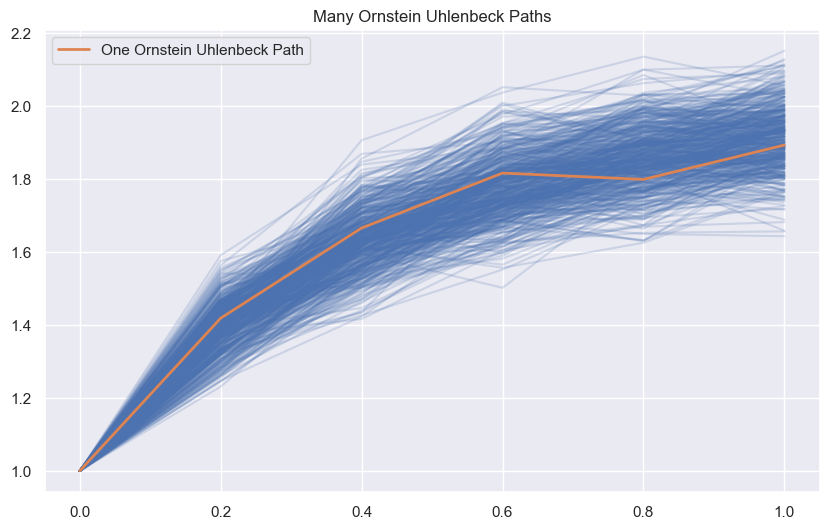

In [7]:
ornstein_uhlenbeck.plot_sim(n_times=5, 
                            final_time=1, 
                            paths=ornstein_uhlenbeck_paths) # we plot the paths 

Observe the resemblance of the Ornstein-Uhlenbeck paths to a steep yield curve. By modifying the Ornstein-Uhlenbeck parameters, we can generate alternative yield curve shapes. This explains the popularity of Ornstein-Uhlenbeck as a model for simulating and calibrating interest rate models. In essence, it serves as the predominant interest rate model in the quantitative finance literature.

Our mail goal is to try to retrieve the true parameters of the Ornstein-Uhlenbeck, $\kappa$, $\theta$, $\sigma$ we just simulated with different methods . Our procedure is just to confirm that the methods we will use are true and robust .

#### Our Calibration Data 

To calibrate our model, we will utilize only one path of 2000 observations of the OU process. This is because we require sufficient data to calibrate the model, and in reality, we will only have one realization of the process.

Let's recall our problem and how our data must look like : 

Let $S_t, S_{t+\Delta t}, S_{t+2 \Delta t}, \ldots, S_{t+N \Delta t}$ with $\Delta t=(T-t) / N$ be a sequence of discrete values observed at regular time intervals $\Delta t>0$ which are assumed to follow an Ornstein-Uhlenbeck process . So, we clearly see at this stage that we deal with only one path observation instead of many paths at the same time . This path is a particular realization of a stochastic process . Let's generate only one path with our class.

In [8]:
ornstein_uhlenbeck = OrnsteinUhlenbeck(kappa=KAPPA,
                                       theta=THETA,
                                       sigma=SIGMA) # parameters of the OU Process we will try to retreive 

In [9]:
ornstein_uhlenbeck_paths = ornstein_uhlenbeck.stochastic_process_sim(init_value=1,
                                                                     n_times=2000, # many timesteps for many data
                                                                     n_paths=1, # only one realization 
                                                                     final_time=1,
                                                                     random_state=rng,
                                                                     increments=True)
ornstein_uhlenbeck_paths # we store all the paths to visualize it 

array([[1.        ],
       [1.0069441 ],
       [1.01072292],
       ...,
       [1.90594954],
       [1.90917686],
       [1.90722538]])

In [10]:
ornstein_uhlenbeck_paths.shape # Great ! 

(2001, 1)

Great Job ! Now we have our data . The next step is to estimate the value of the parameters $(m,c)$ of our optimization problem and then, calculate the estimated parameters $\kappa$, $\theta$, $\sigma$ of the Ornstein-Uhlenbeck model . 

Let's recall our optimization problem : 

$$
\underset{m, c \in \mathbb{R}}{\operatorname{minimise}} \sum_{i=1}^N\left(S_{t+i \Delta t}-m S_{t+(i-1) \Delta t}-c\right)^2
$$

which we wrote under this more theoretical framework : 

$$
\underset{\theta = (m, c) \in \mathbb{R}}{\text{minimize}} \,L(\theta) = \mathbb{E} F(\theta, W) = \mathbb{E} F(\theta, \epsilon_i)
$$

where $\epsilon_i$ $\sim \mathcal{N}\left(0, \sigma_\epsilon^2\right)$



Our goal is to find the optimization problem parameters $(m, c)$ so that we reproduce the data observed on the market ( the data of our simulation in our case ) . Within this framework, we observe a **linear relationship** between the **current value of the stock and its immediate past value**. Hence, we have to fit a **linear regression** model to estimate first the parameters $(m,c)$ of our optimization problem and then after, we will derive the Ornstein-Uhlenbeck params. 

A linear regression model can be considered as a <a href="https://www.ibm.com/think/topics/supervised-learning">supervised learning algorithm</a> . A supervised learning algorithm is a type of machine learning algorithm where the data is labeled . In other words, to an explanatory variables matrix X, we associate an labeled vector y which is measured or observed based on the explanatory variables .

In our case, our explanatory variables are the set of all stock prices $S_{t+(i-1) \Delta t}$ observed at time ${t+(i-1) \Delta t}$ , that is : $$X=\left\{S_{t+(i-1) \Delta t, i = 1, ..., N}\right\}$$ and our labels are the set of all stock prices $S_{t+i \Delta t}$ observed at time ${t+i \Delta t}$ that is : $$y=\left\{S_{t+i \Delta t, i = 1, ..., N}\right\}$$

But our data is about a time series of the stock prices following an OU process . So, we have a major problem : We have to **convert our OU generated stock prices process** into a **supervised learning problem** where we could be able to find both the matrices X ( for variables ) and y ( for labels ). In a time series framework, we called such a problem **windowing a dataset** . Windowing is a method to turn a time series dataset into supervised learning problem. In other words, we want to use windows of the past to predict the future. For example, let's consider this time series dataset : 
    
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] . 
Windowing this univariate time series dataset for **one week** consists of the following decomposition

    [0, 1, 2, 3, 4, 5, 6] -> [7]
    [1, 2, 3, 4, 5, 6, 7] -> [8]
    [2, 3, 4, 5, 6, 7, 8] -> [9]
    
where the left hand elements can be considered as explanatory variables and the right hand elements as the labels. 

Let's consider another realistic example : 

    [123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049, 125.961]

Window for **one week** with the **target of predicting the next day (Bitcoin prices)** consists of the following

    [123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]
    [125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]
    [108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]
    
<img src="tsd.png" alt="Transposition of a vector" title="Vector transposition" width="750">

Fortunately, we have developed a comprehensive method utilizing NumPy that enables the complete decomposition of any time series into a sequence of explanatory variables of arbitrary length and corresponding labels of arbitrary length. We will utilize our own `ncxs99_utilities` library, which contains all the necessary utility functions and classes. Therefore, we will not provide these functions again. However, you are welcome to implement them to gain a deeper understanding of the code 😉. 

In [11]:
from ncxs99_utilities import make_windows, make_train_test_splits

Let's define a window and an horizon . We will use a window of one day to predict the next price move

In [12]:
HORIZON = 1 # Global variable for horizon to predict 1 step at a time
WINDOW_SIZE = 1 # Global variable for Window_size to use one day worth of timesteps to predict the horizon

Before windowing our dataset, we will remove the extra dimension of our data since our function only works with 1D array . 

In [13]:
ornstein_uhlenbeck_paths = np.squeeze(ornstein_uhlenbeck_paths, axis=1)
ornstein_uhlenbeck_paths

array([1.        , 1.0069441 , 1.01072292, ..., 1.90594954, 1.90917686,
       1.90722538])

In [14]:
full_windows, full_labels = make_windows(ornstein_uhlenbeck_paths, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2000, 2000)

In [15]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [1.] -> Label: [1.0069441]
Window: [1.0069441] -> Label: [1.01072292]
Window: [1.01072292] -> Label: [1.01154598]


In [16]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [1.90626888] -> Label: [1.90594954]
Window: [1.90594954] -> Label: [1.90917686]
Window: [1.90917686] -> Label: [1.90722538]


Let's create a pandas dataframe to better see our full data and our windowed time series .

In [17]:
ornstein_uhlenbeck_paths

array([1.        , 1.0069441 , 1.01072292, ..., 1.90594954, 1.90917686,
       1.90722538])

In [18]:
ornstein_uhlenbeck_dataframe = pd.DataFrame(data={'X':np.squeeze(full_windows,axis=1),
                  'y':np.squeeze(full_labels, axis=1)})

In [19]:
ornstein_uhlenbeck_dataframe.head()

,X,y
0,1.000000,1.006944
1,1.006944,1.010723
2,1.010723,1.011546
3,1.011546,1.014290
4,1.014290,1.022867


Great ! Before going even further, let's plot explanatory variables X versus labels y to see what we could see .

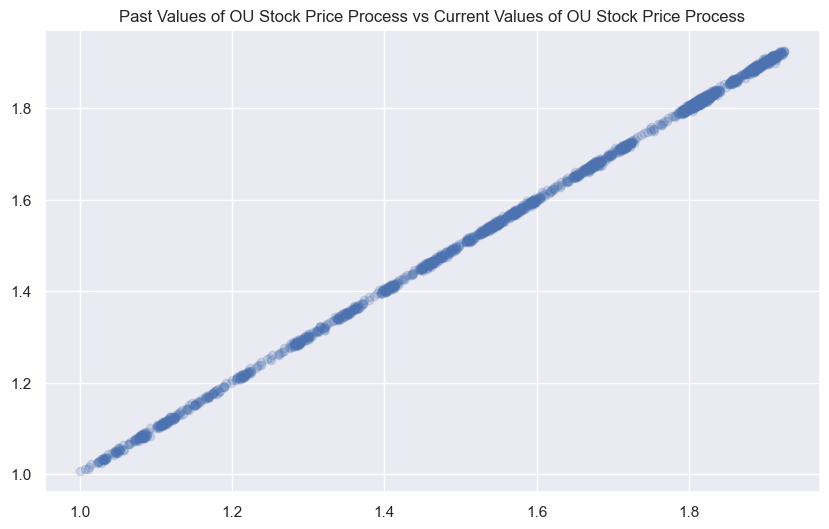

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(ornstein_uhlenbeck_dataframe['X'], ornstein_uhlenbeck_dataframe['y'], alpha=0.2)
plt.title('Past Values of OU Stock Price Process vs Current Values of OU Stock Price Process')
plt.show()

Wooooaaaaah ! Look at that ! Great 😎 ! Indeed, the relationship between the current stock prices values and the past stock prices values is **linear**. This is confirmed in our data . **We will use this data to estimate our optimzation problem parameters $(m, c)$**. So, this demonstrates that : 

- Our Ornstein-Uhlenbeck class is robust and the stochastic process is well developed 

- Our method of using OLS and stochastic optimization is true and can be used 

- The problem of estimating OU parameters is well defined

- Our `ncxs99_utilities` and `ncsx99_module` libraries methods are robust, flexible, vectorized .

#### Split The Data Into Train And Test Sets

One step again 🥵 ! Before constructing our model to estimate the parameters $(m, c)$, we have to split our data into train and test sets. This is very important in machine learning workflow . In time series specifically, **we must split our data so that we have the past data in the training set and the future data in the test set.**

Of course there's no way we can actually access data from the future. But we can engineer our test set to be in the future with respect to the training set. To do this, we can create an abitrary point in time to split our data.
Everything before the point in time can be considered the training set and everything after the point in time can be considered the test set.

<img src="tss.png" alt="Transposition of a vector" title="Vector transposition" width="750">

Time to split our time series . Again, we will use `ncxs99_utilities`.

In [21]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1600, 400, 1600, 400)

In [22]:
train_windows[:5], train_labels[:5] # five first examples of data 

(array([[1.        ],
        [1.0069441 ],
        [1.01072292],
        [1.01154598],
        [1.01429046]]),
 array([[1.0069441 ],
        [1.01072292],
        [1.01154598],
        [1.01429046],
        [1.02286702]]))

Let's plot our data to see how it looks like .

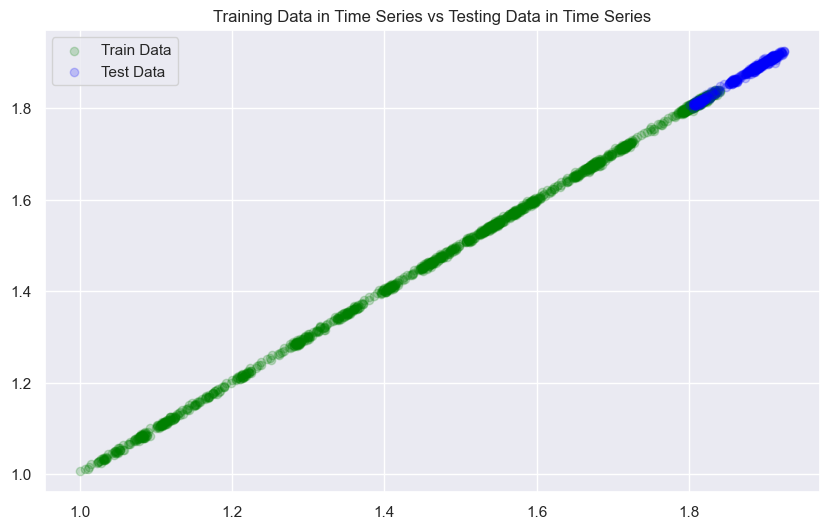

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(np.squeeze(train_windows, axis=1),np.squeeze(train_labels, axis=1), label='Train Data', c='green', alpha=0.2)
plt.scatter(np.squeeze(test_windows, axis=1),np.squeeze(test_labels, axis=1), label='Test Data', c='blue', alpha=0.2)
plt.legend()
plt.title('Training Data in Time Series vs Testing Data in Time Series')
plt.show()

Great 😎 !! Beautiful 😉 !!! Now, the most exciting part of our project . We will now build a model able to learn our optimization problem parameters $(m, c)$.

#### Estimation Of $(m,c)$ : PyTorch Workflow

In order to estimate our $(m,c)$ parameters, we will use <a href="https://pytorch.org">PyTorch</a> . PyTorch is an open-source deep learning framework developed by Meta's AI Research lab. It provides a flexible and intuitive platform for building and training deep learning models, particularly excelling in applications like computer vision and natural language processing. 

One of PyTorch's standout features is its <a href="https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/">dynamic computation graph system</a>, which allows developers to modify the <a href="https://www.geeksforgeeks.org/computational-graphs-in-deep-learning/">computational graph</a> on the fly. This flexibility facilitates rapid experimentation and prototyping, making it a preferred choice for researchers and developers. 

Additionally, PyTorch's seamless integration with Python enables compatibility with popular libraries such as <a href="https://numpy.org">NumPy</a>, enhancing its accessibility and ease of use for Python developers. 

The framework also offers robust support for <a href="https://buseyaren.medium.com/what-is-a-gpu-are-they-needed-for-deep-learning-94dd4aeb45f6">GPU</a> acceleration, which is essential for handling the intensive computations required in deep learning tasks. This capability ensures efficient model <a href="https://pytorch.org/tutorials/intermediate/flask_rest_api_tutorial.html">training and deployment</a> across various hardware configurations. 

These attributes—dynamic computation graphs, Python integration, and GPU support—contribute to PyTorch's widespread adoption in the deep learning community. Its user-friendly interface and adaptability make it a powerful tool for both academic research and industrial applications. 

Here are the main steps for PyTorch workflow . We will try to follow all these steps to better estimate our parameters. But before beginning, let's import torch . 

<img src="mlprocess.png" alt="Transposition of a vector" title="Vector transposition" width="750">

In [24]:
import torch
from torch import nn

Display the version

In [25]:
torch.__version__

'2.2.1'

When importing <a href='https://pytorch.org' >`torch`</a> module in <a href='https://www.python.org/doc/essays/blurb/'>`Python`</a> programming language, we have to ensure that this deep learning library have access to an accelerator . In other words, we must define a <a href='https://buseyaren.medium.com/what-is-a-gpu-are-they-needed-for-deep-learning-94dd4aeb45f6'>GPU</a> in order for our model, to be very efficient when performing calculations . Since we used a Macbook with their <a href='https://redaktor.co/tech/apple-m1-vs-m2-vs-m3-comparison/'>M</a> chips with integrated GPU, then our device agnostic code will be slightly different from what we can find on the <a href='https://pytorch.org/docs/stable/notes/cuda.html'>PyTorch GPU Documentation</a> .

In [26]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device 

'mps'

Great 😎 ! We have an access to an acceleretor . Time to follow our PyTorch Workflow

#### A-1 Get Data Ready

The first step in our PyTorch workflow is to get the data ready . Fortunately, we spent a lot of time to create and preprocess the data . Let's recall the main previous steps : 

- We simulated the Ornstein-Uhlenbeck process using our `OrnsteinUhlenbeck` class.

- We generated a path of 2000 observations to provide our PyTorch model with data to identify patterns.

- We validated our data by visualizing it and confirming the existence of a linear relationship between the current observed prices and the past observed prices.

This is the primary reason why, for any finance or machine learning project, we must dedicate a significant amount of time to preprocessing and data cleaning.

In the first step of the PyTorch workflow, we have 5 criteria to verify : 

- **A-1-1 : Generate, Simulate and Preprocess The Data** : Checked 😎✅

- **A-1-2 : Visualize The Data** : Checked 😎✅

- **A-1-3 : Split The Data Into Train And Test Sets** : Checked 😎✅

- **A-1-4 : Turn The Data Into Tensors**

How can we turn numpy arrays into PyTorch tensors ? 
To turn numpy arrays into PyTorch tensors, we can use the following functions :
<a href="https://pytorch.org/docs/stable/generated/torch.as_tensor.html">torch.as_tensor</a> and 
<a href="https://pytorch.org/docs/stable/generated/torch.from_numpy.html">torch.from_numpy</a> . Which method should I use ? In our case, we used the second option but if you want to understand the differences between the two, check this link : <a href="https://discuss.pytorch.org/t/from-numpy-vs-as-tensor/79932/4">Difference between torch.as_tensor and torch.from_numpy</a>

In [27]:
train_windows = torch.from_numpy(train_windows).type(torch.float)
train_labels = torch.from_numpy(train_labels).type(torch.float)
test_windows = torch.from_numpy(test_windows).type(torch.float)
test_labels = torch.from_numpy(test_labels).type(torch.float)

Here, we convert our data in <a href="https://pytorch.org/docs/stable/generated/torch.Tensor.float.html">torch.tensor.float</a> because PyTorch loves floating 32 numbers which is the **by default** data type of PyTorch.

In [28]:
train_windows[:5], train_labels[:5] # first five observations 

(tensor([[1.0000],
         [1.0069],
         [1.0107],
         [1.0115],
         [1.0143]]),
 tensor([[1.0069],
         [1.0107],
         [1.0115],
         [1.0143],
         [1.0229]]))

Great ! All our data are tensors ! 

- **A-1-5 : Put The Data Into GPU With Device Agnostic Code**

In [29]:
train_windows = train_windows.to(device)
train_labels = train_labels.to(device)
test_windows = test_windows.to(device)
test_labels = test_labels.to(device)

In [30]:
train_windows[:5], train_labels[:5]  # first five observations 

(tensor([[1.0000],
         [1.0069],
         [1.0107],
         [1.0115],
         [1.0143]], device='mps:0'),
 tensor([[1.0069],
         [1.0107],
         [1.0115],
         [1.0143],
         [1.0229]], device='mps:0'))

Our Data are tensors and are on the GPU ! Great ! Time to build a model! 

**A-2 Build Or Pick A Pretrained Model**

Time to build a PyTorch model to learn parameters with stochastic optimization .

**A-2-1 Create A Model**

In [31]:
class StochasticAlgorithmRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.m = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
        self.c = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.m * x + self.c 

Let's observe our model .

In [32]:
torch.manual_seed(42)
model = StochasticAlgorithmRegression()
model.state_dict()

OrderedDict([('m', tensor([0.3367])), ('c', tensor([0.1288]))])

Wow, that’s awesome 😎! Look at those model parameters, $m$ and $c$. We’ll estimate them using the power of <a href="https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/">dynamic computation graphs</a> and the <a href="https://pytorch.org/docs/stable/autograd.html">automatic differentiation</a> of the PyTorch framework.

In fact, when we create a PyTorch model by manually specifying its parameters, PyTorch will utilize advanced mathematical computations to estimate these parameters. How PyTorch will estimate these parameters ? By using stochastic algorithms methods ! What are these stochastic algorithms methods ? These stochastic algorithms methods are the optimizers we have to set up during the building of the model ( more on that later ) ! And all these stochastic algorithms methods fall under our theoretical framework and the theoretical framework of the <a href="https://www.lpsm.paris/users/pages/index">Gilles Pagès</a> monte carlo simulation course. In essence, all the computations performed during optimization are merely specific instances of the theoretical framework of stochastic algorithms.

**A-2-2 : Put The Model On GPU**

In [33]:
model = model.to(device)
model.state_dict()

OrderedDict([('m', tensor([0.3367], device='mps:0')),
             ('c', tensor([0.1288], device='mps:0'))])

Beautiful 😉 ! Now let's set up the most important part of this code ! The loss function and the optimizer and why we decided to use such a method !

**A-2-3 : Set Up A Loss Function And An Optimizer**

When performing a linear regression model, the common loss functions used are the <a href="https://en.wikipedia.org/wiki/Mean_absolute_error">Mean Absolute Error or MAE</a> and the <a href="https://en.wikipedia.org/wiki/Mean_squared_error">Mean Squared Error or MSE</a> . But in our case we must pay attention ! Why ? Let's recall again the loss function we have to reduce : 

$$
\underset{m, c \in \mathbb{R}}{\operatorname{minimise}} \sum_{i=1}^N\left(S_{t+i \Delta t}-m S_{t+(i-1) \Delta t}-c\right)^2
$$

which we wrote under this more theoretical framework : 

$$
\underset{\theta = (m, c) \in \mathbb{R}}{\text{minimize}} \,L(\theta) = \mathbb{E} F(\theta, W) = \mathbb{E} F(\theta, \epsilon_i)
$$

where $\epsilon_i$ $\sim \mathcal{N}\left(0, \sigma_\epsilon^2\right)$

When we look at carefully these loss functions, we see that we have to **minimise the sum and only the sum and not the mean !**. In fact, we could obtain the same results either using the mean or the sum but in our case, we will move with the sum . And this is why PyTorch is one of the best framework used in academic research and in industry. Indeed, in PyTorch, ( almost ! ) everything is customisable meaning that we can create our **own loss function**, our **own neural networks architectures or model**, and optimize our **own problem** . When we understand the theoretical framework and what mathematical equations means, we can ( virtually ! ) optimize any problem we may accounter with the power of automatic differentiation and dynamic computation graphs . PyTorch is not only a framework to do deep learning but a powerful optimization problem solver ! We can create anything to optimize . But we have to better understand the problem, and understand the mathematical equations to think the solutions . Time to create our own loss functions !

In [34]:
def loss_fn(y_true: torch.tensor, y_pred:torch.tensor) -> torch.tensor:
    return torch.sum(torch.pow(y_true - y_pred, 2))

Let's test our loss function

In [35]:
a = torch.tensor([1, 2, 3]) # y_true 
b = torch.tensor([0.99, 1.99, 2.99]) # y_pred
loss_fn(a, b)

tensor(0.0003)

We see clearly that our loss functions works pretty well since the loss goes to zero . y_pred is very closed to y_true .

Let's define our optimizer ! The optimizer is one of the most important aspect for our optimization parameters estimation . The optimizer is just applications and consequences of stochastic algorithms methods. The most famous algorithms known are : 

- <a href="https://machinelearningmastery.com/gradient-descent-optimization-from-scratch/">Gradient Descent<a> : 
    
In deep learning, the objective function is usually the average of the loss functions for each example in the training dataset. Given a training dataset of $n$ examples, we assume that $f_i(\mathbf{x})$ is the loss function with respect to the training example of index $i$, where $\mathbf{x}$ is the parameter vector. Then we arrive at the objective function
$$
f(\mathbf{x})=\frac{1}{n} \sum_{i=1}^n f_i(\mathbf{x})
$$

The gradient of the objective function at $\mathbf{x}$ is computed as
$$
\nabla f(\mathbf{x})=\frac{1}{n} \sum_{i=1}^n \nabla f_i(\mathbf{x})
$$

If gradient descent is used, the computational cost for each independent variable iteration is $O(n)$, which grows linearly with $n$. Therefore, when the training dataset is larger, the cost of gradient descent for each iteration will be higher.

Stochastic gradient descent (SGD) reduces computational cost at each iteration. At each iteration of stochastic gradient descent, we uniformly sample an index $i \in\{1, \ldots, n\}$ for data examples at random, and compute the gradient $\nabla f_i(\mathbf{x})$ to update $\mathbf{x}$ :
$$
\mathbf{x} \leftarrow \mathbf{x}-\eta \nabla f_i(\mathbf{x}),
$$
where $\eta$ is the learning rate. We can see that the computational cost for each iteration drops from $O(n)$ of the gradient descent to the constant $O(1)$
    
Let's recall the definition of stochastic approximation methods : 

Stochastic approximation can also be presented as a probabilistic extension of Newton-Raphson like zero search recursive procedures of the form
$$
\forall n \geq 0, \quad y_{n+1}=y_n-\gamma_{n+1} h\left(y_n\right) \quad\left(0<\gamma_n \leq \gamma_0\right),
$$

where $h: \mathbb{R}^d \rightarrow \mathbb{R}^d$ is a continuous vector field satisfying a sub-linear growth assumption at infinity and where $h(y)=\mathbb{E} H(y, Z)$ where $Z$ is a $q$-dimensional random vector.
    
This formulation aligns with the stochastic approximation framework where:

-  $\gamma$ corresponds to the parameter $\eta$ 
-  $y$ corresponds to the parameter $\mathbf{x}$.
-  $h(y)$ corresponds to the gradient $\nabla f(\mathbf{x})$.
- $H(y, Z)$ corresponds to the stochastic gradient $\nabla f_i(\mathbf{x})$.
- $Z$ represents the random error of the data index $i$.

Therefore, SGD is a particular instance of stochastic approximation methods applied to optimization problems.
    
- <a href="https://machinelearningmastery.com/adam-optimization-from-scratch/">ADAM</a>
   
One of the key components of Adam is that it uses exponential weighted moving averages
(also known as leaky averaging) to obtain an estimate of both the momentum and also the second moment of the gradient. That is, it uses the state variables
$$
\begin{aligned}
& \mathbf{v}_t \leftarrow \beta_1 \mathbf{v}_{t-1}+\left(1-\beta_1\right) \mathbf{g}_t \\
& \mathbf{s}_t \leftarrow \beta_2 \mathbf{s}_{t-1}+\left(1-\beta_2\right) \mathbf{g}_t^2
\end{aligned}
$$

Here $\beta_1$ and $\beta_2$ are nonnegative weighting parameters. Common choices for them are $\beta_1=0.9$ and $\beta_2=0.999$. That is, the variance estimate moves much more slowly than the momentum term. Note that if we initialize $\mathbf{v}_0=\mathbf{s}_0=0$ we have a significant amount of bias initially towards smaller values. This can be addressed by using the fact that $\sum_{i=0}^{t-1} \beta^i=\frac{1-\beta^t}{1-\beta}$ to re-normalize terms. Correspondingly the normalized state variables are given by
$$
\hat{\mathbf{v}}_t=\frac{\mathbf{v}_t}{1-\beta_1^t} \text { and } \hat{\mathbf{s}}_t=\frac{\mathbf{s}_t}{1-\beta_2^t}
$$

Armed with the proper estimates we can now write out the update equations. First, we rescale the gradient in a manner very much akin to that of RMSProp to obtain
$$
\mathbf{g}_t^{\prime}=\frac{\eta \hat{\mathbf{v}}_t}{\sqrt{\widehat{\mathbf{s}_t}+\epsilon}}
$$

Unlike RMSProp our update uses the momentum $\hat{\mathbf{v}}_t$ rather than the gradient itself. Moreover, there is a slight cosmetic difference as the rescaling happens using $\frac{1}{\sqrt{\hat{s}_t}+\epsilon}$ instead of $\frac{1}{\sqrt{\mathrm{~s}_t+\epsilon}}$. The former works arguably slightly better in practice, hence the deviation from RMSProp. Typically we pick $\epsilon=10^{-6}$ for a good trade-off between numerical stability and fidelity.

Now we have all the pieces in place to compute updates. This is slightly anticlimactic and we have a simple update of the form
$$
\mathbf{x}_t \leftarrow \mathbf{x}_{t-1}-\mathbf{g}_t^{\prime}
$$
    
Here again, Adam is a particular instance of stochastic approximation methods applied to optimization problems. This is why, we decided to use stochastic algorithms to approximate optimisations parameters $(m, c)$.

In [36]:
optimizer = torch.optim.Adam(params=model.parameters(),
                            lr=0.1)

**A-3 Fit The Model To The Data And Make Predictions**

Time to fit a model on the data and make predictions 😎

In [37]:
torch.manual_seed(42)
epoch_count = []
train_loss_count = []
test_loss_count = []
epochs = 500

for epoch in range(epochs):
    
    ### Training Loop
    
    ### Set the model to train mode 
    model.train()
    
    ## 1 . Do the Forward Pass
    y_preds = model(train_windows)
    
    ## 2. Calculate the loss
    loss = loss_fn(y_true=train_labels, y_pred=y_preds)
    
    ## 3 . Optimizer zero_grad 
    optimizer.zero_grad()
    
    ## 4. Loss Backward 
    loss.backward()
    
    ## 5 . Optimizer Step
    optimizer.step()
    
    ### Testing Loop
    
    ### Set the model to evaluate mode 
    model.eval()
    
    with torch.inference_mode():
        
        ## 1. Do the forward pass
        test_preds = model(test_windows)
        
        ## 2. Calculate the loss
        test_loss = loss_fn(y_true=test_labels, y_pred=test_preds)
        
    if epoch % 50 == 0:
        epoch_count.append(epoch)
        train_loss_count.append(loss.cpu().detach().numpy())
        test_loss_count.append(test_loss.cpu().detach().numpy())
        print(f"Epoch:{epoch} | Train Loss:{loss} | Test Loss:{test_loss}")

Epoch:0 | Train Loss:1313.136962890625 | Test Loss:275.03924560546875
Epoch:50 | Train Loss:9.84327220916748 | Test Loss:0.3770265579223633
Epoch:100 | Train Loss:2.5245912075042725 | Test Loss:0.8915143013000488
Epoch:150 | Train Loss:0.8096047639846802 | Test Loss:0.3433474600315094
Epoch:200 | Train Loss:0.21079939603805542 | Test Loss:0.08547626435756683
Epoch:250 | Train Loss:0.05372045189142227 | Test Loss:0.019929680973291397
Epoch:300 | Train Loss:0.02241559512913227 | Test Loss:0.006807959638535976
Epoch:350 | Train Loss:0.017635319381952286 | Test Loss:0.004759370349347591
Epoch:400 | Train Loss:0.017076566815376282 | Test Loss:0.004499888978898525
Epoch:450 | Train Loss:0.01702696643769741 | Test Loss:0.004470000974833965


🥵 See how our loss decreases ! Great ! So, now . Let's do some predictions with our model and evaluate it .

**Make Predictions**

In [38]:
model.eval() ## always set the model to eval mode 
with torch.inference_mode():
    y_preds = model(test_windows)
y_preds [:5]

tensor([[1.8257],
        [1.8237],
        [1.8223],
        [1.8213],
        [1.8221]], device='mps:0')

In [39]:
test_labels[:5]

tensor([[1.8236],
        [1.8221],
        [1.8211],
        [1.8220],
        [1.8234]], device='mps:0')

😎 Hey . Do you see this ? Our model predictions are very very closed to our true labels . Okay . Let's see how our model performs on our data

**A-4 Evaluate The Model**

To evaluate our model, we will use many useful functions . Thank to our own library `ncxs99_utilities` where we can find all kind of functions able to evaluate a model for us with common metrics .

- **Train And Test Loss Plot**

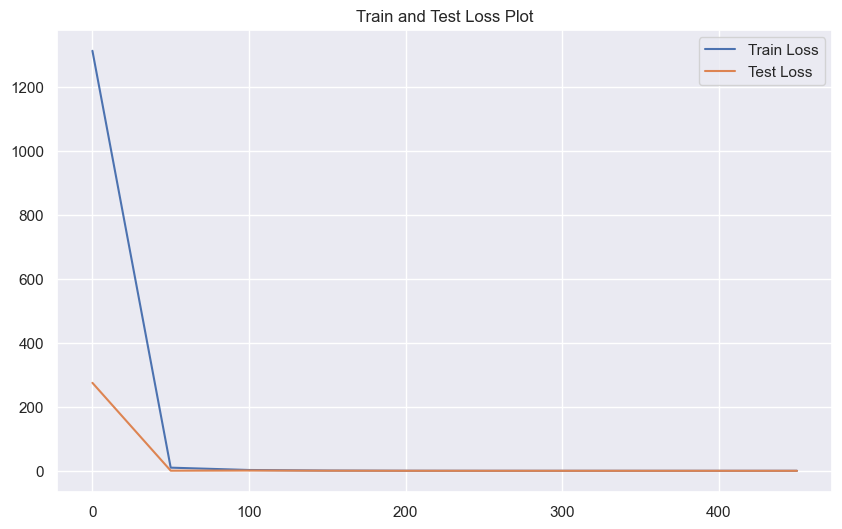

In [40]:
plt.figure(figsize=(10,6))
plt.plot(epoch_count, train_loss_count, label='Train Loss')
plt.plot(epoch_count, test_loss_count, label='Test Loss')
plt.title('Train and Test Loss Plot')
plt.legend()
plt.show()

If we analyze our plot, we can clearly see that as long as the number of epochs is high, then the test loss goes toward the train loss which goes to 0 . Then our model learns very well the linear relationship and doesn't underfit nor overfit .

Let's compute and plot some very important metrics with our own library `ncxs99_utilities`.

In [41]:
from ncxs99_utilities import plot_predictions, evaluate_preds

- **Plot Predictions**

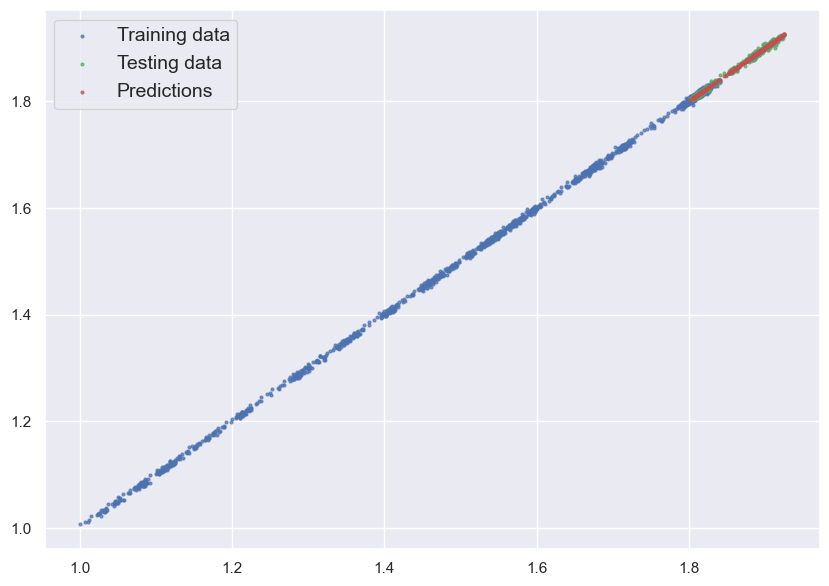

In [42]:
plot_predictions(train_data=train_windows.cpu().numpy(),
                train_labels=train_labels.cpu().numpy(),
                test_data=test_windows.cpu().numpy(),
                test_labels=test_labels.cpu().numpy(),
                predictions=y_preds.cpu().numpy(), alpha=0.7)

Our model performs very very well ! It is a quasi perfect model . Let's compute some useful metrics .

- **Evaluate The Metrics**

In [43]:
evaluate_preds(y_true=test_labels.cpu().numpy(),
              y_pred=y_preds.cpu().numpy())

{'mae': 0.0026544102,
 'mse': 1.1165251e-05,
 'rmse': 0.0033414443,
 'mape': 0.001415368,
 'mase': 0.9948355}

😉 Beautiful ! Our regression metrics are very informative . We see that our MAE, RMSE and MSE are very low . Our model performs perfectly . In fact, we obtained these results because the relationship between our data is linear and the ADAM optimizer is a very powerful stochastic optimization algorithm to estimate parameters. 

So, what are the current values of our stochastic optimization problem ? Let's ask to PyTorch !

In [44]:
model.state_dict()

OrderedDict([('m', tensor([0.9988], device='mps:0')),
             ('c', tensor([0.0024], device='mps:0'))])

So, in order to estimate the values of our Ornstein-Uhlenbeck process parameters, the values of $m$ and $c$ that permits us to achieve this task are respectively : 

In [45]:
optimisation_parameters = {'m':model.state_dict()['m'].cpu().numpy(),
                        'c':model.state_dict()['c'].cpu().numpy()}
optimisation_parameters

{'m': array([0.99877155], dtype=float32),
 'c': array([0.00240561], dtype=float32)}

What is the next move after computing our optimization parameters $(m, c)$ ? We will calculate our Ornstein-Uhlenbeck model parameters .

#### A-5 Estimating Ornstein-Uhlenbeck Model Parameters 

After computing the optimization parameters $(m, c)$, then, we may compute the OU model parameters as follow : 

$$
\kappa=-\frac{\log m}{\Delta t}, \quad \theta=\frac{c}{1-m} \quad \text { and } \quad \sigma=\sigma_\epsilon \sqrt{\frac{2 \kappa}{1-e^{-2 \kappa \Delta t}}} .
$$

Before computing $\kappa$ and $\theta$, let's see how we can compute $\sigma_\epsilon$ , which is very important to estimate the volatility of the model . Let's recall the definition of $\epsilon$ via our loss function.

$$
\underset{m, c \in \mathbb{R}}{\operatorname{minimise}} \sum_{i=1}^N\left(S_{t+i \Delta t}-m S_{t+(i-1) \Delta t}-c\right)^2 
$$

From this loss, we can deduce the value of $\epsilon_i$ : 
$$
\epsilon_i = S_{t+i \Delta t}-m S_{t+(i-1) \Delta t}-c
$$

$\epsilon_i$ corresponds to the theoretical values of the errors . But, because we want to estimate OU parameters, especially the empirical volatility, we have to use the **empirical estimation** of errors . So, instead of using theoretical values of $\epsilon_i$, let's define **empirical** values of the errors : 

$$
\hat\epsilon_i = S_{t+i \Delta t}-\hat{m} S_{t+(i-1) \Delta t}- \hat{c}
$$

At this stage, we can easily compute $\sigma_\epsilon$ . Indeed, we have : 

- Generated data of the observed OU process as the sequence of observed stock prices

- Explanatory variables X and labels y 

- Estimated parameters of $(m, c)$, namely $(\hat{m}, \hat{c})$ which means that we could also obtain all the **estimated** errors $\hat\epsilon_i$. Indeed, $\sigma_\epsilon$ will be equal to the **standard deviation of the empirical variance of $\epsilon_i$, estimated on all the data.** Think of it as if we have a sequence of empirical observation $\left\{\epsilon_i,_{i = 0, ...,N}\right\}$ and we want to estimate the empirical variance of such sequence .

Let's compute step by step all the errors and then compute the $\sigma_\epsilon$, necessary to estimate the empirical volatility of the OU model .

So, first thing first, let's compute the predicted values $\hat y$ on all the dataset but before beginning let's convert our full explanatory variable dataset into tensors and put it on GPU .

In [46]:
full_windows = torch.from_numpy(full_windows).type(torch.float)
full_windows = full_windows.to(device) # Device Agnostic Code 

In [47]:
model.eval() ### Set the model in eval mode 
with torch.inference_mode():
    all_preds = model(full_windows)
all_preds[:5]

tensor([[1.0012],
        [1.0081],
        [1.0119],
        [1.0127],
        [1.0155]], device='mps:0')

In [48]:
ornstein_uhlenbeck_dataframe['y_hat'] = np.squeeze(all_preds.detach().cpu().numpy(), axis=1)
ornstein_uhlenbeck_dataframe.head(7)

,X,y,y_hat
0,1.000000,1.006944,1.001177
1,1.006944,1.010723,1.008113
2,1.010723,1.011546,1.011887
3,1.011546,1.014290,1.012709
4,1.014290,1.022867,1.015450
5,1.022867,1.024311,1.024016
6,1.024311,1.025347,1.025458


Then, let's compute the errors of all the data

In [49]:
ornstein_uhlenbeck_dataframe['epsilons'] = ornstein_uhlenbeck_dataframe['y'] - ornstein_uhlenbeck_dataframe['y_hat']
ornstein_uhlenbeck_dataframe.head(5)

,X,y,y_hat,epsilons
0,1.000000,1.006944,1.001177,0.005767
1,1.006944,1.010723,1.008113,0.002610
2,1.010723,1.011546,1.011887,-0.000341
3,1.011546,1.014290,1.012709,0.001581
4,1.014290,1.022867,1.015450,0.007417


Now the final part ! Let's create a class of functions to estimate definitely the OU parameters with stochastic optimization .

In [50]:
class StochasticOrnsteinUhlenbeckCalibration:
    
    def __init__(self, final_time:float, n_times:int, parameters:dict, data:pd.DataFrame):
        self.final_time = final_time
        self.n_times = n_times
        self.parameters = parameters
        self.data = data
     
    
    def stochastic_kappa(self):
    
        dt = self.final_time / self.n_times
    
        return - np.log(self.parameters['m']) / dt


    def stochastic_theta(self):
    
        return self.parameters['c'] / ( 1 - self.parameters['m'])
    
    
    def stochastic_sigma(self):
    
        dt = self.final_time / self.n_times
    
        sigma_epsilon = np.sqrt(self.data['epsilons'].var())
    
        kappa = self.stochastic_kappa()
    
        return sigma_epsilon * np.sqrt((2 * kappa)/(1 - np.exp(- 2 * kappa * dt)))
    
    
    def stochastic_estimated_parameters(self):
        
        kappa = self.stochastic_kappa()

        theta = self.stochastic_theta()

        sigma = self.stochastic_sigma()
        
        return {'stochastic_kappa':kappa,
               'stochastic_theta':theta,
               'stochastic_sigma':sigma}
    
    
    def dataframe_display(self, kappa:float, theta:float, sigma:float):
        
        estimated_dict = self.stochastic_estimated_parameters()
        display_dict = {'Model Parameters':['True Value', 'Stochastic Algorithm Estimation'],
                         'kappa':[kappa, estimated_dict['stochastic_kappa'][0]],
                         'theta':[theta, estimated_dict['stochastic_theta'][0]],
                         'sigma':[sigma, estimated_dict['stochastic_sigma'][0]]}
        
        return pd.DataFrame(data=display_dict)

In [51]:
stochastic_estimated_parameters = StochasticOrnsteinUhlenbeckCalibration(final_time=1,
                                                 n_times=2000,
                                                 parameters=optimisation_parameters,
                                                 data=ornstein_uhlenbeck_dataframe)
stochastic_estimated_parameters.stochastic_estimated_parameters()

{'stochastic_kappa': array([2.4584136], dtype=float32),
 'stochastic_theta': array([1.9582433], dtype=float32),
 'stochastic_sigma': array([0.14671734], dtype=float32)}

In [52]:
stochastic_estimated_parameters.dataframe_display(kappa=KAPPA,
                                    theta=THETA,
                                    sigma=SIGMA)

,Model Parameters,kappa,theta,sigma
0,True Value,2.000000,2.000000,0.150000
1,Stochastic Algorithm Estimation,2.458414,1.958243,0.146717


Our optimization algorithm seems to be good enough to well compute OU model parameters . Let's dive into the second method estimation : <a href="https://builtin.com/data-science/ols-regression">Ordinary Least Squares Or OLS</a>.

#### B. Ordinary Least Squares Method

The problem definition of the Ordinary Least Squares (OLS) method is identical to that of stochastic algorithms. The primary distinction between the two methods lies in the approach taken to approximate the optimization parameters $(m,c)$ using a stochastic algorithm. In contrast, OLS methods can derive an exact and optimal optimization parameters $(m,c)$ analytically, without resorting to stochastic methods for approximation. 

Let's define and solve the problem again : 

We let the relationship between consecutive $S_t, S_{t+\Delta t}, \ldots, S_{t+N \Delta t}$ be
$$
S_{t+\Delta t}=m S_t+c+\epsilon_t, \epsilon_t \sim \mathcal{N}\left(0, \sigma_\epsilon^2\right)
$$
where $m$ and $c$ are the regression parameters, $\epsilon_t$ is normally distributed and is independent and identically distributed.

By comparing the relationship between the linear fit and the solution of the OrnsteinUhlenbeck process model
$$
S_{t+\Delta t}=S_t e^{-\kappa \Delta t}+\theta\left(1-e^{-\kappa \Delta t}\right)+\int_t^{t+\Delta t} \sigma e^{-\kappa(t+\Delta t-u)} d W_u
$$
where $\int_t^{t+\Delta t} \sigma e^{-\kappa(t+\Delta t-u)} d W_u \sim \mathcal{N}\left(0, \frac{\sigma^2}{2 \kappa}\left(1-e^{-2 \kappa \Delta t}\right)\right)$, the Ornstein-Uhlenbeck parameters can be equated as
$$
\kappa=-\frac{\log m}{\Delta t}, \quad \theta=\frac{c}{1-m} \quad \text { and } \quad \sigma=\sigma_\epsilon \sqrt{\frac{2 \kappa}{1-e^{-2 \kappa \Delta t}}} .
$$


As for estimating the pair $(m, c)$, we can compute it by solving the following ordinary least-squares problem
$$
O L S\left\{\underset{m, c \in \mathbb{R}}{\operatorname{minimise}} \sum_{i=1}^N\left(S_{t+i \Delta t}-m S_{t+(i-1) \Delta t}-c\right)^2\right\}.
$$

By setting $f(m, c)=\sum_{i=1}^N\left(S_{t+i \Delta t}-m S_{t+(i-1) \Delta t}-c\right)^2$ and taking partial derivatives with respect to $m$ and $c$,
$$
\begin{aligned}
& \frac{\partial f}{\partial m}=-2 \sum_{i=1}^N\left(S_{t+i \Delta t}-m S_{t+(i-1) \Delta t}-c\right) S_{t+(i-1) \Delta t}=-2\left(S_{x y}-m S_{x x}-c S_x\right) \\
& \frac{\partial f}{\partial c}=-2 \sum_{i=1}^N\left(S_{t+i \Delta t}-m S_{t+(i-1) \Delta t}-c\right)=-2\left(S_y-m S_x-c N\right)
\end{aligned}
$$
where
$$
\begin{gathered}
S_x=\sum_{i=1}^N S_{t+(i-1) \Delta t}, \quad S_y=\sum_{i=1}^N S_{t+i \Delta t} \\
S_{x x}=\sum_{i=1}^N S_{t+(i-1) \Delta t}^2, \quad S_{y y}=\sum_{i=1}^N S_{t+i \Delta t}^2, \quad S_{x y}=\sum_{i=1}^N S_{t+(i-1) \Delta t} S_{t+i \Delta t} .
\end{gathered}
$$

By setting the partial derivatives to zero and solving the linear equations simultaneously, the estimates $\hat{m}$ and $\hat{c}$ that minimise $O L S$ are given as
$$
\hat{m}=\frac{N S_{x y}-S_x S_y}{N S_{x x}-S_x^2}, \quad \hat{c}=\frac{S_y-\hat{m} S_x}{N}
$$

From these equations, we could clearly derive some very fundamental and important patterns in the field of machine learning in particular and optimization: 

- <a href="https://builtin.com/data-science/ols-regression">OLS</a> methods are particular cases of stochastic algorithms : Indeed, in OLS methods, we try to derive analytically ( or at least numerically if a closed solution is impossible to find ), the partial derivatives of the loss function with respect to the **optimization model parameters $(m,c)$** . In essence, in Ordinary Least Squares (OLS), we aim to derive an **analytical formula** for the partial derivatives of the loss function with respect to our optimization parameters. Subsequently, we set these partial derivatives to zero and seek to find an **explicit analytical formula for the optimal parameters $(m,c)$**. If an explicit formula is not attainable, we resort to numerical methods. 


- In <a href="https://machinelearningmastery.com/stochastic-optimization-for-machine-learning/">Stochastic Algorithms</a> methods, when we use some deep learning framework such as <a href="https://www.tensorflow.org">TensorFlow</a> or <a href="https://pytorch.org">PyTorch</a>, the idea is pretty much the same : We want to find again the partial derivatives of the loss wrt to our optimization parameters, but, instead of trying to derive these partial derivatives with analytical closed formula, we will **approximate** them with the power of <a href="https://comp6248.ecs.soton.ac.uk/handouts/autograd-handouts.pdf">Automatic Differentiaton</a>. Automatic Differentiation (AD) is a powerful mathematical technique capable of efficiently and optimally computing the derivatives of any objective function with respect to any optimization parameter, even when the number of parameters ranges into the thousands, millions, or even billions. This is the most crucial component of deep learning models, enabling us to train highly sophisticated and intricate models in a relatively short timeframe. When training highly sophisticated deep learning models with millions or even trillions of parameters, we must compute the partial derivatives of the loss function with respect to each parameter. Computing these derivatives analytically in an efficient and optimal manner is impossible. However, Automatic Differentiation (AD) makes it possible to compute them both efficiently and optimally. Thanks to <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html">torch.autograd</a> which is PyTorch's package for automatic differentiation and thanks to <a href="https://www.tensorflow.org/guide/autodiff#:~:text=TensorFlow%20provides%20the%20tf.,the%20context%20of%20a%20tf.">tf.GradientTape</a> which is TensorFlow's automatic differentiation package . This is why we used as the first method, stochastic algorithms since implicitly, we used AD to compute the derivatives of the loss function wrt to parameters $m$ and $c$.

It is time to compute the OLS OU parameters and compare them with our stochastic methods.

In [53]:
class OLSOrnsteinUhlenbeckCalibration:
    
    def __init__(self, final_time:int, n_times:int, data:pd.DataFrame):
        self.final_time = final_time
        self.n_times = n_times
        self.data = data 
     
    def __s_x_y(self):
        return np.sum(self.data['X'] * self.data['y'])
    
    
    def __s_x(self):
        return np.sum(self.data['X'])
    
    
    def __s_y(self):
        return np.sum(self.data['y'])
    
    
    def __s_x_x(self):
        return np.sum(np.power(self.data['X'],2))
    
    
    def __s_y_y(self):
        return np.sum(np.power(self.data['y'],2))
    
    
    def __m_hat(self):
        
        return (self.data.shape[0] * self.__s_x_y() - 
                self.__s_x() * self.__s_y())/(self.data.shape[0] * self.__s_x_x() - np.power(self.__s_x(),2))
    
    
    def __c_hat(self):
        
        return (self.__s_y() - self.__m_hat() * self.__s_x()) / self.data.shape[0]
    
    
    def __sigma_epsilon(self):
        
        return np.sqrt(self.data['epsilons'].var())
    
    
    def ols_kappa(self):
        
        dt = self.final_time / self.n_times
        
        return - np.log(self.__m_hat()) / dt 
    
    
    def ols_theta(self):
        
        return self.__c_hat() / ( 1 - self.__m_hat())
    
    
    def ols_sigma(self):
        
        dt = self.final_time / self.n_times
        
        return self.__sigma_epsilon() * np.sqrt(2 * self.ols_kappa()/(1 - np.exp(- 2 * self.ols_kappa() * dt)))
    
    
    def ols_estimated_parameters(self):
        
        kappa = self.ols_kappa()
        theta = self.ols_theta()
        sigma = self.ols_sigma()
        
        return {'ols_kappa':kappa,
               'ols_theta':theta,
               'ols_sigma':sigma}
    
    def dataframe_display(self, kappa:float, theta:float, sigma:float):
        
        stochastic_optimal_parameters = StochasticOrnsteinUhlenbeckCalibration(final_time=self.final_time,
                                                                              n_times=self.n_times,
                                                                              parameters=optimisation_parameters,
                                                                              data=ornstein_uhlenbeck_dataframe)
        estimated_stochastic_dict = stochastic_optimal_parameters.stochastic_estimated_parameters()
        estimated_ols_dict = self.ols_estimated_parameters()
        display_dict = {'Model Parameters':['True Value', 'Stochastic Algorithm Estimation', 'OLS Estimation'],
                         'kappa':[kappa, estimated_stochastic_dict['stochastic_kappa'][0],estimated_ols_dict['ols_kappa']],
                         'theta':[theta, estimated_stochastic_dict['stochastic_theta'][0],estimated_ols_dict['ols_theta']],
                         'sigma':[sigma, estimated_stochastic_dict['stochastic_sigma'][0],estimated_ols_dict['ols_sigma']]}
        
        return pd.DataFrame(data=display_dict)

In [54]:
ols_estimated_parameters = OLSOrnsteinUhlenbeckCalibration(final_time=1,
                                                          n_times=2000,
                                                          data=ornstein_uhlenbeck_dataframe)
ols_estimated_parameters.ols_estimated_parameters()

{'ols_kappa': 2.2631054855181976,
 'ols_theta': 2.0066261657226314,
 'ols_sigma': 0.14671074825575606}

In [55]:
ols_estimated_parameters.dataframe_display(kappa=KAPPA,
                                          theta=THETA,
                                          sigma=SIGMA)

,Model Parameters,kappa,theta,sigma
0,True Value,2.000000,2.000000,0.150000
1,Stochastic Algorithm Estimation,2.458414,1.958243,0.146717
2,OLS Estimation,2.263105,2.006626,0.146711


Our results are super close, either with stochastic algorithms or the OLS method. These two methods are both robust and equivalent. Great 👌 ! It also means that we well generate and preprocess our data . So, let's move on to our third and last method : Maximum Likelihood Estimation Method .

#### C. Maximum Likelihood Estimation

In statistics, <a href="https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#:~:text=In%20statistics%2C%20maximum%20likelihood%20estimation,distribution%2C%20given%20some%20observed%20data.">Maximum Likelihood Estimation</a> is a fundamental method used to estimate the parameters of a probability distribution by maximizing a likelihood function, so that under the assumed statistical model, the observed data is most probable. 

Concept : 

Imagine you have a dataset and you assume it follows a certain probability distribution, such as a normal distribution. This distribution is characterized by parameters like the mean $\mu$ and standard deviation $\sigma$. MLE helps you find the specific values of these parameters that make the observed data most likely. In other words, it identifies the parameter values that maximize the probability of observing the given data. 

The Likelihood Function : 

The likelihood function is central to MLE. It represents the probability of the observed data as a function of the parameters of the model. By adjusting these parameters, MLE seeks to find the values that maximize this function. Mathematically, if you have a set of independent and identically distributed data points, the likelihood function is the product of the individual probabilities of each data point. Often, for computational convenience, the natural logarithm of the likelihood function, known as the log-likelihood, is used because it simplifies the mathematics without changing the location of the maximum. 

Applications in Statistical Modeling : 

MLE is widely used across various fields for parameter estimation in statistical models. For instance, in linear regression, MLE can be used to estimate the coefficients that define the relationship between independent and dependent variables.


Let's define the problem under the MLE framework : 

Before stepping into MLE estimation, let's recall that if $S_t, S_{t+\Delta t}, S_{t+2 \Delta t}, \ldots, S_{t+N \Delta t}$ with $\Delta t=(T-t) / N$ is a sequence of discrete values observed at regular time intervals $\Delta t>0$ which are assumed to follow an Ornstein-Uhlenbeck process : 

$$
d S_t=\kappa\left(\theta-S_t\right) d t+\sigma d W_t
$$
where the mean-reversion rate $\kappa$, long-term mean $\theta$ and volatility $\sigma$ are constant parameters and $W_t$ is a standard Wiener process on the probability space $(\Omega, \mathscr{F}, \mathbb{P})$, 

then, the stochastic process $S_{t + \Delta t} \lvert\, S_t$ is distributed according to the following probability law : 

$S_{t+\Delta t} \left\lvert\, S_t \sim \mathcal{N}\left(S_t e^{-\kappa \Delta t}+\theta\left(1-e^{-\kappa \Delta t}\right), \frac{\sigma^2}{2 \kappa}\left(1-e^{-2 \kappa \Delta t}\right)\right)\right.$.


**Log-Likelihood Estimation :** 


By setting $s^2=\frac{\sigma^2}{2 \kappa}\left(1-e^{-2 \kappa \Delta t}\right)$, the likelihood function is the joint density of $S_t, S_{t+\Delta t}$, $\ldots, S_{t+N \Delta t}$ such that
$$
\ell(\kappa, \theta, s)=\prod_{i=1}^N \frac{1}{s \sqrt{2 \pi}} \exp \left[-\frac{1}{2}\left(\frac{S_{t+i \Delta t}-S_{t+(i-1) \Delta t} e^{-\kappa \Delta t}-\theta\left(1-e^{-\kappa \Delta t}\right)}{s}\right)^2\right]
$$
and taking the log-likelihood
$$
\begin{aligned}
\log \ell(\kappa, \theta, s)= & -N \log s-\frac{N}{2} \log (2 \pi) \\
& -\frac{1}{2 s^2} \sum_{i=1}^N\left[S_{t+i \Delta t}-S_{t+(i-1) \Delta t} e^{-\kappa \Delta t}-\theta\left(1-e^{-\kappa \Delta t}\right)\right]^2
\end{aligned}
$$

Taking partial differentials with respect to $\kappa, \theta$ and $s$,
$$
\begin{aligned}
\frac{\partial \log \ell}{\partial \kappa} & =-\frac{1}{s^2} \sum_{i=1}^N\left[S_{t+i \Delta t}-S_{t+(i-1) \Delta t} e^{-\kappa \Delta t}-\theta\left(1-e^{-\kappa \Delta t}\right)\right]\left[S_{t+(i-1) \Delta t}-\theta\right] \Delta t e^{-\kappa \Delta t} \\
& =-\frac{\Delta t e^{-\kappa \Delta t}}{s^2} \sum_{i=1}^N\left[\left(S_{t+i \Delta t}-\theta\right)\left(S_{t+(i-1) \Delta t}-\theta\right)-\left(S_{t+(i-1) \Delta t}-\theta\right)^2 e^{-\kappa \Delta t}\right] \\
\frac{\partial \log \ell}{\partial \theta} & =\frac{1-e^{-\kappa \Delta t}}{s^2} \sum_{i=1}^N\left[S_{t+i \Delta t}-S_{t+(i-1) \Delta t} e^{-\kappa \Delta t}-\theta\left(1-e^{-\kappa \Delta t}\right)\right] \\
\frac{\partial \log \ell}{\partial s} & =-\frac{N}{s}+\frac{1}{s^3} \sum_{i=1}^N\left[S_{t+i \Delta t}-S_{t+(i-1) \Delta t} e^{-\kappa \Delta t}-\theta\left(1-e^{-\kappa \Delta t}\right)\right]^2
\end{aligned}
$$

By setting $\frac{\partial \log \ell}{\partial \kappa}=0, \frac{\partial \log \ell}{\partial \theta}=0$ and $\frac{\partial \log \ell}{\partial s}=0$, the maximum-likelihood estimates $\hat{\kappa}, \hat{\theta}$ and $\hat{s}$ are
$$
\begin{aligned}
\hat{\kappa} & =-\frac{1}{\Delta t} \log \left[\frac{\sum_{i=1}^N\left(S_{t+i \Delta t}-\hat{\theta}\right)\left(S_{t+(i-1) \Delta t}-\hat{\theta}\right)}{\sum_{i=1}^N\left(S_{t+(i-1) \Delta t}-\hat{\theta}\right)^2}\right] \\
\hat{\theta} & =\frac{\sum_{i=1}^N\left(S_{t+i \Delta t}-S_{t+(i-1) \Delta t} e^{-\hat{\kappa} \Delta t}\right)}{N\left(1-e^{-\hat{\kappa} \Delta t}\right)} \\
\hat{s}^2 & =\frac{1}{N} \sum_{i=1}^N\left[S_{t+i \Delta t}-\hat{\theta}-\left(S_{t+(i-1) \Delta t}-\hat{\theta}\right) e^{-\hat{\kappa} \Delta t}\right]^2
\end{aligned}
$$

Letting
$$
\begin{gathered}
S_x=\sum_{i=1}^N S_{t+(i-1) \Delta t}, \quad S_y=\sum_{i=1}^N S_{t+i \Delta t} \\
S_{x x}=\sum_{i=1}^N S_{t+(i-1) \Delta t}^2, \quad S_{y y}=\sum_{i=1}^N S_{t+i \Delta t}^2, \quad S_{x y}=\sum_{i=1}^N S_{t+(i-1) \Delta t} S_{t+i \Delta t}
\end{gathered}
$$
we have
$$
\begin{aligned}
\hat{\kappa}= & -\frac{1}{\Delta t} \log \left[\frac{S_{x y}-\hat{\theta}\left(S_x+S_y\right)+N \hat{\theta}^2}{S_{x x}-2 \hat{\theta} S_x+N \hat{\theta}^2}\right] \\
\hat{\theta}= & \frac{S_y-S_x e^{-\hat{\kappa} \Delta t}}{N\left(1-e^{-\hat{\kappa} \Delta t}\right)} \\
\hat{s}^2= & \frac{1}{N}\left[S_{y y}-2 S_{x y} e^{-\hat{\kappa} \Delta t}+S_{x x} e^{-2 \hat{\kappa} \Delta t}-2 \hat{\theta}\left(S_y-S_x e^{-\hat{\kappa} \Delta t}\right)\left(1-e^{-\hat{\kappa} \Delta t}\right)\right. \\
& \left.+N \hat{\theta}^2\left(1-e^{-\hat{\kappa} \Delta t}\right)^2\right]
\end{aligned}
$$

Substituting $\hat{\kappa}$ into $\hat{\theta}$,
$$
\begin{aligned}
N \hat{\theta} & =\frac{S_y\left(S_{x x}-2 \hat{\theta}+N \hat{\theta}^2\right)-S_x\left(S_{x y}-\hat{\theta} S_x-\hat{\theta} S_y+N \hat{\theta}^2\right)}{S_{x x}-S_{x y}+\hat{\theta}\left(S_y-S_x\right)} \\
& =\frac{S_y S_{x x}-S_x S_{x y}+\hat{\theta}\left(S_x^2-S_x S_y\right)+N \hat{\theta}^2\left(S_y-S_x\right)}{S_{x x}-S_{x y}+\hat{\theta}\left(S_y-S_x\right)}
\end{aligned}
$$
or
$$
N \hat{\theta}\left(S_{x x}-S_{x y}\right)+N \hat{\theta}^2\left(S_y-S_x\right)=S_y S_{x x}-S_x S_{x y}+\hat{\theta}\left(S_x^2-S_x S_y\right)+N \hat{\theta}^2\left(S_y-S_x\right)
$$
and hence
$$
\hat{\theta}=\frac{S_y S_{x x}-S_x S_{x y}}{N\left(S_{x x}-S_{x y}\right)-S_x^2+S_x S_y}
$$
with the maximum-likelihood estimates of mean-reversion rate $\hat{\kappa}$ and volatility $\hat{\sigma}$ being
$$
\hat{\kappa}=-\frac{1}{\Delta t} \log \left[\frac{S_{x y}-\hat{\theta}\left(S_x+S_y\right)+N \hat{\theta}^2}{S_{x x}-2 \hat{\theta} S_x+N \hat{\theta}^2}\right] \quad \text { and } \quad \hat{\sigma}=\sqrt{\frac{2 \hat{\kappa} \hat{s}^2}{1-e^{-2 \hat{\kappa} \Delta t}}}
$$
respectively.

Let's code this method to see what get and compare our results with these two previous methods .

In [56]:
class LogLikeOrnsteinUhlenbeckCalibration:
    
    def __init__(self, final_time:int, n_times:int, data:pd.DataFrame):
        self.final_time = final_time
        self.n_times = n_times
        self.data = data 
        
        
    def __s_x(self):
        return np.sum(self.data['X'])
    
    
    def __s_y(self):
        return np.sum(self.data['y'])
    
    
    def __s_x_x(self):
        return np.sum(np.power(self.data['X'],2))
    
    
    
    def __s_y_y(self):
        return np.sum(np.power(self.data['y'],2))
    
    
    
    def __s_x_y(self):
        return np.sum(self.data['X'] * self.data['y'])
    
    
    
    def log_like_theta(self):
        
        return (self.__s_y() * self.__s_x_x() - self.__s_x() * self.__s_x_y()) / (self.data.shape[0] * 
                                                                                  (self.__s_x_x() - self.__s_x_y()) - np.power(self.__s_x(),2) + self.__s_x() * self.__s_y())
    
    def log_like_kappa(self):
        
        dt = self.final_time / self.n_times
        
        return - (1 / dt) * np.log((self.__s_x_y() - self.log_like_theta() * (self.__s_x() + self.__s_y()) + 
                                    self.data.shape[0] * np.power(self.log_like_theta(),2))/ (self.__s_x_x() - 
                                                                                              2 * self.log_like_theta() * self.__s_x() + 
                                                                                              self.data.shape[0] * np.power(self.log_like_theta(),2)))
    
    def __s_square_hat(self):
        
        dt = self.final_time / self.n_times
        
        return (1 / self.data.shape[0]) * (self.__s_y_y() - 2 * self.__s_x_y() * np.exp(-self.log_like_kappa() * dt) + 
                                          self.__s_x_x() * np.exp(-2 * self.log_like_kappa() * dt) - 
                                          2 * self.log_like_theta() * (self.__s_y() - self.__s_x() * np.exp(-self.log_like_kappa() * dt))
                                          * (1 - np.exp(-self.log_like_kappa() * dt)) + 
                                           self.data.shape[0] * np.power(self.log_like_theta(),2) * np.power((1 - np.exp(-self.log_like_kappa() * dt)),2))

    
    def log_like_sigma(self):
        
        dt = self.final_time / self.n_times
        
        return np.sqrt((2 * self.log_like_kappa() * self.__s_square_hat()) / (1 - np.exp(- 2 * self.log_like_kappa() * dt)))
    
    
    def log_like_estimated_parameters(self):
        
        kappa = self.log_like_kappa()
        theta = self.log_like_theta()
        sigma = self.log_like_sigma()
        
        return {'log_like_kappa':kappa,
               'log_like_theta':theta,
               'log_like_sigma':sigma}
    
    
    def dataframe_display(self, kappa:float, theta:float, sigma:float):
        
        stochastic_optimal_parameters = StochasticOrnsteinUhlenbeckCalibration(final_time=self.final_time,
                                                                              n_times=self.n_times,
                                                                              parameters=optimisation_parameters,
                                                                              data=ornstein_uhlenbeck_dataframe)
        estimated_stochastic_dict = stochastic_optimal_parameters.stochastic_estimated_parameters()
        ols_optimal_parameters = OLSOrnsteinUhlenbeckCalibration(final_time=self.final_time,
                                                                 n_times=self.n_times,
                                                                 data=ornstein_uhlenbeck_dataframe)
        estimated_ols_dict = ols_optimal_parameters.ols_estimated_parameters()
        estimated_log_like_dict = self.log_like_estimated_parameters()
        display_dict = {'Model Parameters':['True Value', 'Stochastic Algorithm Estimation', 'OLS Estimation', 'LogLikeLihood Estimation'],
                         'kappa':[kappa, estimated_stochastic_dict['stochastic_kappa'][0],estimated_ols_dict['ols_kappa'], estimated_log_like_dict['log_like_kappa']],
                         'theta':[theta, estimated_stochastic_dict['stochastic_theta'][0],estimated_ols_dict['ols_theta'], estimated_log_like_dict['log_like_theta']],
                         'sigma':[sigma, estimated_stochastic_dict['stochastic_sigma'][0],estimated_ols_dict['ols_sigma'], estimated_log_like_dict['log_like_sigma']]}
        
        return pd.DataFrame(data=display_dict)
        

In [57]:
log_like_estimated_parameters = LogLikeOrnsteinUhlenbeckCalibration(final_time=1,
                                                          n_times=2000,
                                                          data=ornstein_uhlenbeck_dataframe)
log_like_estimated_parameters.log_like_estimated_parameters()

{'log_like_kappa': 2.2631054855408723,
 'log_like_theta': 2.0066261657174573,
 'log_like_sigma': 0.1466697568714732}

In [58]:
log_like_estimated_parameters.dataframe_display(kappa=KAPPA,
                                          theta=THETA,
                                          sigma=SIGMA)

,Model Parameters,kappa,theta,sigma
0,True Value,2.000000,2.000000,0.150000
1,Stochastic Algorithm Estimation,2.458414,1.958243,0.146717
2,OLS Estimation,2.263105,2.006626,0.146711
3,LogLikeLihood Estimation,2.263105,2.006626,0.146670


**Future Improvements**

This project could definitely be enhanced. Let’s experiment with different approaches to see how well our calibration works out! 

**Things to try :** 

- Normalize the data before feeding our PyTorch model with it ! In other words, try to normalize the data to see if we have any improvement of our model to estimate the optimization parameters $(m,c)$

- Instead of using only one path of Ornstein-Uhlenbeck process, simulate many paths of the model ( for example 500 paths ), then take the average mean for all the time steps of all the simualation in order to have a more robust data that is not sensitive to outliers 

- Use cross validation in the data . Instead of only split the time series in train and test sets, use a cross validation to see how it performs globally on any data ....